# Нейронная Сеть (трехслойный персептон)

In [4]:
from icecream import ic
import numpy as np
import matplotlib.pyplot as pl
import scipy.special as sc
%matplotlib inline

In [5]:
class neuralNetwork:
    
    def __init__(self, inputNodes, hiddenNodes, outputNodes, learningrate):
        
        self.inodes = inputNodes
        self.hnodes = hiddenNodes
        self.onodes = outputNodes
        
        self.lr = learningrate
        
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        self.activation_function = lambda x: sc.expit(x)
        
        pass
    

    def train(self, inputs_list, targets_list):
        
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)
        
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass
    
    def query(self, inputs_list):
        
        inputs = np.array(inputs_list, ndmin = 2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    

In [6]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

learning_rate = 0.3

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

n.query([1.0, 0.5, -1.5])

array([[0.35628432],
       [0.34267138],
       [0.5508303 ]])

# Набор рукописных цифр MNIST

In [7]:
data_file = open("/Users/admin/ProjectsPython/DataSet/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [8]:
len(data_list)

100

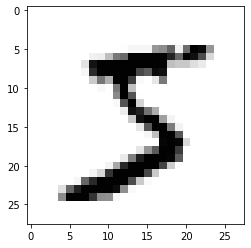

In [16]:
all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
pl.imshow(image_array, cmap='Greys', interpolation='None')

### Подготовка тренировочных данных

#### Масштабируем значения пикселов по значения функции активации:

In [17]:
scaled_input = (np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [18]:
onodes = 10

targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

In [19]:
print(targets)

[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]


### Работа с экземпляром НС и базой MNIST

In [20]:
input_nodes = 784 #28x28
hidden_nodes = 100
output_nodes = 10 

learning_rate = 0.3

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

training_data_file = open("/Users/admin/ProjectsPython/DataSet/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

for record in training_data_list:
    
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    
    n.train(inputs, targets)
    
    pass
    

In [22]:
test_data_file = open("/Users/admin/ProjectsPython/DataSet/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [23]:
all_values = test_data_list[0].split(',')
ic(all_values[0])

ic| all_values[0]: '7'


'7'

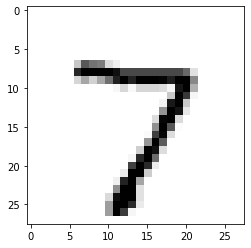

In [24]:
image_array = np.asfarray(all_values[1:]).reshape((28,28))
pl.imshow(image_array, cmap='Greys', interpolation='None')

In [26]:
n.query((np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01)

array([[0.02606183],
       [0.00144918],
       [0.01263697],
       [0.06164776],
       [0.06957597],
       [0.01496034],
       [0.00486064],
       [0.83010168],
       [0.04472677],
       [0.01301448]])

In [28]:
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    print(correct_label, "истинный маркер")
    inputs = (np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    print(label, "ответ сети")
    
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    
    print("")
    pass

7 истинный маркер
7 ответ сети

2 истинный маркер
3 ответ сети

1 истинный маркер
1 ответ сети

0 истинный маркер
0 ответ сети

4 истинный маркер
4 ответ сети

1 истинный маркер
1 ответ сети

4 истинный маркер
4 ответ сети

9 истинный маркер
3 ответ сети

5 истинный маркер
4 ответ сети

9 истинный маркер
7 ответ сети



In [29]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [31]:
np.argmax(outputs)

7

In [32]:
outputs

array([[0.05515515],
       [0.00332426],
       [0.00543411],
       [0.00665947],
       [0.37744909],
       [0.01130324],
       [0.02037089],
       [0.57283979],
       [0.02579734],
       [0.0280519 ]])

In [34]:
scorecard_array = np.asarray(scorecard)
print("Эффективность = ", scorecard_array.sum() / scorecard_array.size)

Эффективность =  0.6


### Тренировка и тестирование сети с использованием полной базы данных MNIST

In [44]:
input_nodes = 784 #28x28
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

training_data_file = open("/Users/admin/ProjectsPython/DataSet/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

for record in training_data_list:
    
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    
    n.train(inputs, targets)
    
    pass

test_data_file = open("/Users/admin/ProjectsPython/DataSet/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    
    pass

In [45]:
scorecard_array = np.asarray(scorecard)
print("Эффективность = ", scorecard_array.sum() / scorecard_array.size)

Эффективность =  0.9459
